In [1]:
# pip install keras

In [2]:
import tensorflow as tf
from keras import backend as k
 
###################################
# TensorFlow wizardry
config = tf.ConfigProto()
 
# Don't pre-allocate memory; allocate as-needed
config.gpu_options.allow_growth = True
 
# Create a session with the above options specified.
k.tensorflow_backend.set_session(tf.Session(config=config))

C:\Users\hjlee\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
###############################
# 분류 CNN을 위한 데이터 준비  
###############################
from keras import datasets 

class DATA():
    def __init__(self):
        num_classes = 10

        (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
        img_rows, img_cols = x_train.shape[1:]

        if backend.image_data_format() == 'channels_first':
            x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
            x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
            input_shape = (1, img_rows, img_cols)
        else:
            x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
            x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
            input_shape = (img_rows, img_cols, 1)

        x_train = x_train.astype('float32')
        x_test = x_test.astype('float32')
        x_train /= 255
        x_test /= 255

        y_train = keras.utils.to_categorical(y_train, num_classes)
        y_test = keras.utils.to_categorical(y_test, num_classes)
        
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.x_train, self.y_train = x_train, y_train
        self.x_test, self.y_test = x_test, y_test

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib

def plot_acc(history, title=None):
    # summarize history for accuracy
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Accracy')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()


def plot_loss(history, title=None):
    # summarize history for loss
    if not isinstance(history, dict):
        history = history.history

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    if title is not None:
        plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training data', 'Validation data'], loc=0)
    # plt.show()

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 36s 742us/step - loss: 0.3745 - acc: 0.8986 - val_loss: 0.1855 - val_acc: 0.9492
Epoch 2/3
48000/48000 [==============================] - 35s 722us/step - loss: 0.1477 - acc: 0.9581 - val_loss: 0.1135 - val_acc: 0.9693
Epoch 3/3
48000/48000 [==============================] - 35s 735us/step - loss: 0.0985 - acc: 0.9725 - val_loss: 0.0905 - val_acc: 0.9750


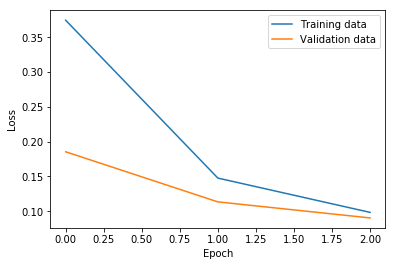

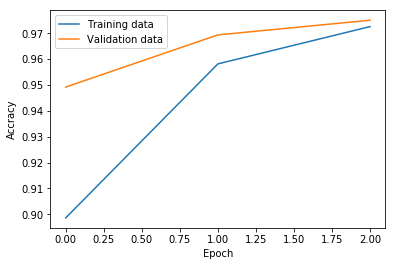

In [5]:
import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.utils import plot_model

data = DATA()

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=data.input_shape))
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(data.num_classes, activation='softmax'))
        
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='rmsprop',
              metrics=['accuracy'])

          
batch_size = 128
epochs = 3

history = model.fit(data.x_train, data.y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.2)
plot_loss(history)
plt.show()
plot_acc(history)
plt.show()

In [7]:
score = model.evaluate(data.x_test, data.y_test)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])



10000/10000 [==============================] - 3s 274us/step

Test loss: 0.08124272379502655
Test accuracy: 0.9761
